<a href="https://colab.research.google.com/github/diego3008/sentiment_analysis_model/blob/main/sentiment_analysis.ipynb%20added%20" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Main Library
import torch

# Data Processing
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Test
x = torch.rand(5,3)
print(x)

tensor([[0.6750, 0.7321, 0.2925],
        [0.6667, 0.7209, 0.9187],
        [0.2852, 0.5836, 0.3635],
        [0.9307, 0.0175, 0.3840],
        [0.3074, 0.2843, 0.2358]])


In [ ]:
# Read test data
testFile = pd.read_csv('test.csv',
                 encoding='latin1',
                 delimiter=',',
                 header=0)

print(testFile.head())
print(testFile.columns)
print("Training data shape:", testFile.shape)

       textID                                               text sentiment  \
0  f87dea47db  Last session of the day  http://twitpic.com/67ezh   neutral   
1  96d74cb729   Shanghai is also really exciting (precisely -...  positive   
2  eee518ae67  Recession hit Veronique Branquinho, she has to...  negative   
3  01082688c6                                        happy bday!  positive   
4  33987a8ee5             http://twitpic.com/4w75p - I like it!!  positive   

  Time of Tweet Age of User      Country  Population -2020  Land Area (Km²)  \
0       morning        0-20  Afghanistan        38928346.0         652860.0   
1          noon       21-30      Albania         2877797.0          27400.0   
2         night       31-45      Algeria        43851044.0        2381740.0   
3       morning       46-60      Andorra           77265.0            470.0   
4          noon       60-70       Angola        32866272.0        1246700.0   

   Density (P/Km²)  
0             60.0  
1            1

In [ ]:
# Check for missing values
print("\nMissing values in training data:")
print(testFile.isnull().sum())


Missing values in training data:
textID              1281
text                1281
sentiment           1281
Time of Tweet       1281
Age of User         1281
Country             1281
Population -2020    1281
Land Area (Km²)     1281
Density (P/Km²)     1281
dtype: int64


In [ ]:
print(testFile['sentiment'].value_counts())

sentiment
neutral     1430
positive    1103
negative    1001
Name: count, dtype: int64


In [ ]:
print(testFile.isnull().sum())

textID              1281
text                1281
sentiment           1281
Time of Tweet       1281
Age of User         1281
Country             1281
Population -2020    1281
Land Area (Km²)     1281
Density (P/Km²)     1281
dtype: int64


/tmp/ipython-input-7-242730914.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=testFile, x="sentiment", palette=["blue", "yellow", "orange"])


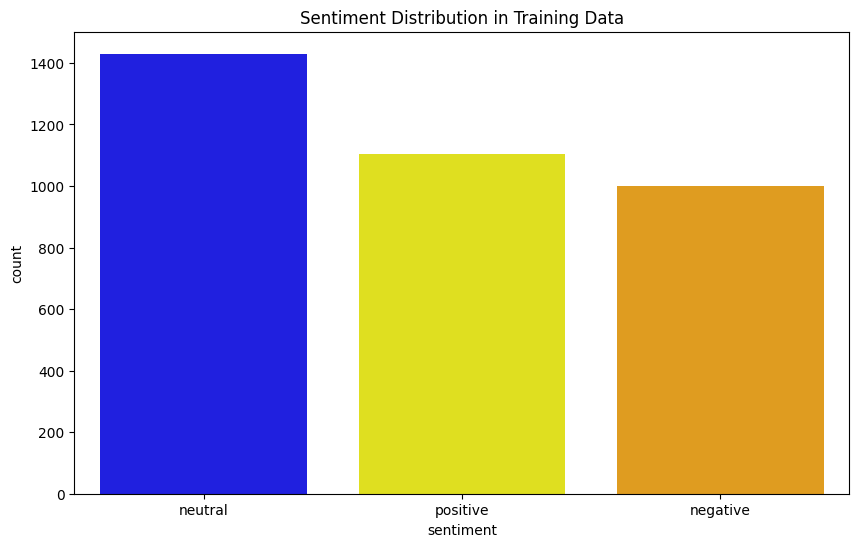

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=testFile, x="sentiment", palette=["blue", "yellow", "orange"])
plt.title('Sentiment Distribution in Training Data')
plt.show()

In [ ]:
testFile["text"] = testFile["text"].astype(str)

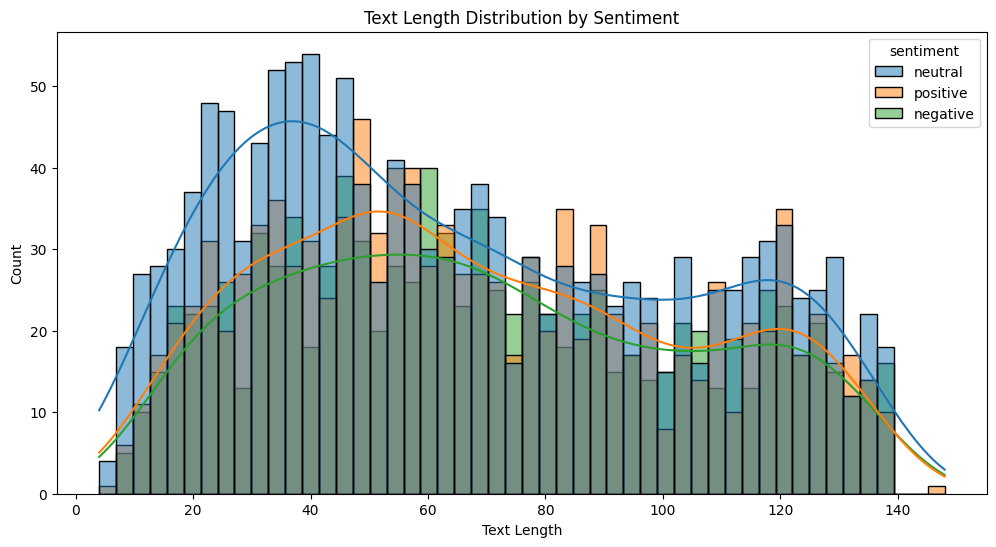

In [ ]:
testFile['text_length'] = testFile['text'].apply(len)
plt.figure(figsize=(12, 6))
sns.histplot(data=testFile, x='text_length', hue='sentiment', bins=50, kde=True)
plt.title('Text Length Distribution by Sentiment')
plt.xlabel('Text Length')
plt.show()
